# Finance Notebook
Construcción de una aplicación para el manejo automatizado de un portafolio financiero.

##### Librerías

In [257]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf

##### Clase Portafolio:

In [258]:
class Portfolio:

    # método de iniciación de la clase, que da ingreso de los inputs, como nombre del portfolio
    def __init__(self, inputs):
        self.inputs = inputs
        p_name = self.inputs['portfolio_name']
        print(f'Portfolio: {p_name} activo')

        # descarga automatica de portfolio al inicio:
        self.ticks = {}  # creamos un diccionario donde podamos guardar los datos de cada accion descargada
        self.download_ticks()  # con esto en init, la descarga es automatica al inicio

    # descripción de la clase
    def __repr__(self):
        return 'Aplicación de manipulación de Portfolio de activos financieros'

    # muestra lista de los ticks del portfolio (los ticks son las  'siglas' de la acción)
    def show_ticks(self):
        for i in range(len(self.inputs['ticks'])):
            tick_name = self.inputs['ticks'][i]
            print(f'{i+1} --> {tick_name}')

    # descarga de valores historicos de las acciones del portfolio enlistados en 'ticks' de 'ingreso'
    def download_ticks(self):
        for tick in self.inputs['ticks']:
            t = yf.Ticker(tick)
            self.ticks[tick] = t

    # creacion de grafico con valores historicos de 'Close' y periodo 'YTD':
    def tick_value(self, tick):
        data = self.ticks[tick].history(period = 'YTD')
        plt.figure(figsize = (12,6))
        plt.title(f'{tick} - YTD Historical close values')
        plt.plot(data.index, data['Close'])
        plt.show()

    # grafica conjunta de todos los valores del portfolio:
    def tick_values(self):
        plt.figure(figsize = (12,6))
        plt.title('Portfolio Ticks - YTD historical timeseries')
        for tick in self.ticks:
            data = self.ticks[tick].history(period = 'YTD')
            plt.plot(data.index, data['Close'], label = tick)
        plt.legend()
        plt.show()

    # grafica de rendimientos individual:
    def tick_return(self, tick):
        data = self.ticks[tick].history(period = 'YTD')
        data['returns'] = data['Close'].pct_change()
        plt.figure(figsize = (12,6))
        plt.title(f'{tick} - YTD Historical returns')
        plt.plot(data.index, data['returns'])
        plt.show()

    def tick_returns(self):
        plt.figure(figsize = (12,6))
        plt.title('Portfolio Ticks - YTD historical returns')
        for tick in self.ticks:
            data = self.ticks[tick].history(period = 'YTD')
            data['returns'] = data['Close'].pct_change()
            plt.plot(data.index, data['returns'], label = tick)
        plt.legend()
        plt.show()

    def compare_ticks(self, tick1, tick2):
        # datos de ticks
        data_t1 = self.ticks[tick1].history(period = 'YTD')
        data_t1['returns'] = data_t1['Close'].pct_change()
        data_t2 = self.ticks[tick2].history(period = 'YTD')
        data_t2['returns'] = data_t2['Close'].pct_change()

        # grafica
        plt.figure()
        plt.plot(data_t1['returns'], data_t2['returns'])
        plt.show()


### Cración de Portfolio y elección de activos

In [259]:
# Portfolio formado por las 5 mejores empresas argentinas que cotizan en bolsa: https://www.cronista.com/finanzas-mercados/que-acciones-argentinas-rindieron-de-mejor-a-peor-en-2022/
# https://finance.yahoo.com/quote/COME.BA?p=COME.BA&.tsrc=fin-srch
# https://finance.yahoo.com/quote/VALO.BA?p=VALO.BA&.tsrc=fin-srch
# https://finance.yahoo.com/quote/TGSU2.BA?p=TGSU2.BA&.tsrc=fin-srch
# https://finance.yahoo.com/quote/CRES.BA?p=CRES.BA&.tsrc=fin-srch
# https://finance.yahoo.com/quote/CEPU.BA?p=CEPU.BA&.tsrc=fin-srch

ingreso = {
    'portfolio_name' : 'Accciones de MERVAL',
    'ticks' : ['COME.BA', 'VALO.BA', 'TGSU2.BA', 'CRES.BA', 'CEPU.BA']
}

In [260]:
port = Portfolio(ingreso)

Portfolio: Accciones de MERVAL activo


In [261]:
port.show_ticks()

1 --> COME.BA
2 --> VALO.BA
3 --> TGSU2.BA
4 --> CRES.BA
5 --> CEPU.BA


In [262]:
port.download_ticks()

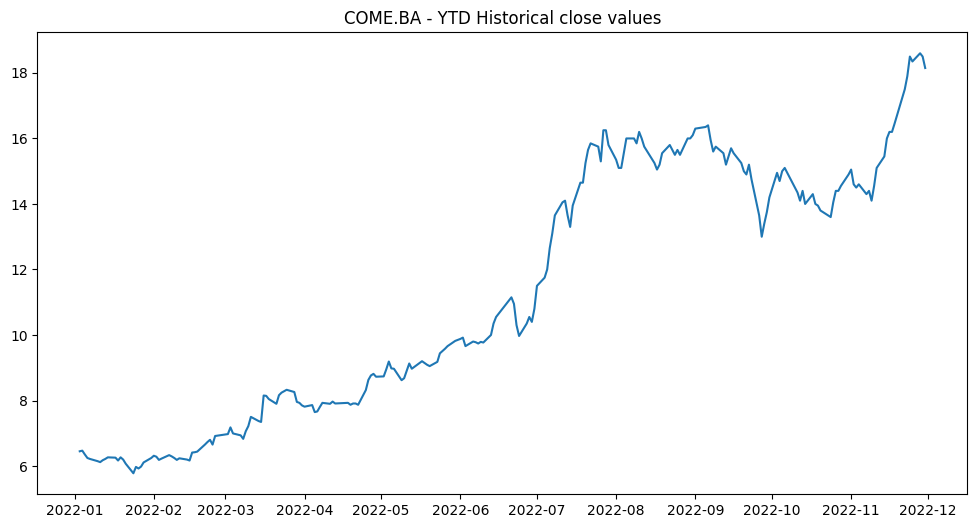

In [263]:
port.tick_value('COME.BA')

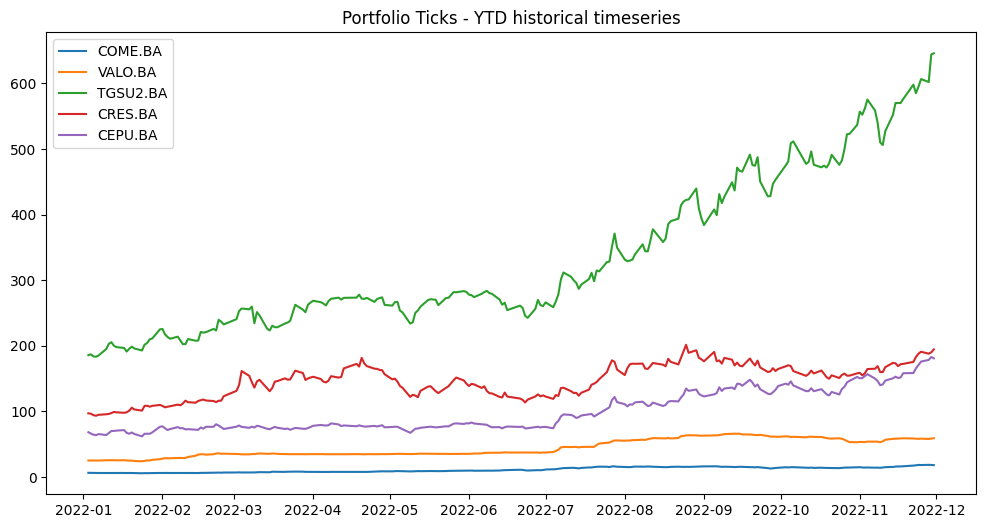

In [264]:
# port.ticks['COME.BA'].history(period='YTD')
port.tick_values()

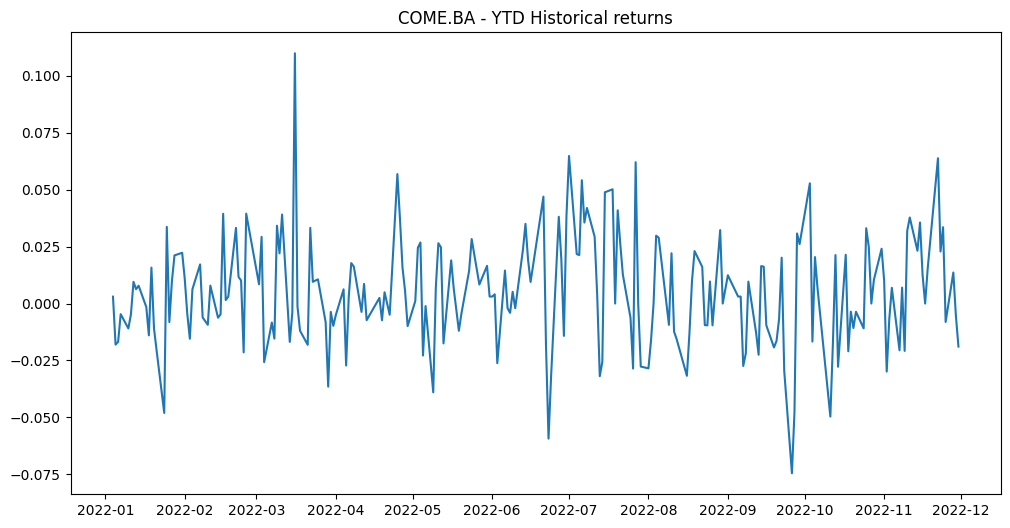

In [265]:
port.tick_return('COME.BA')

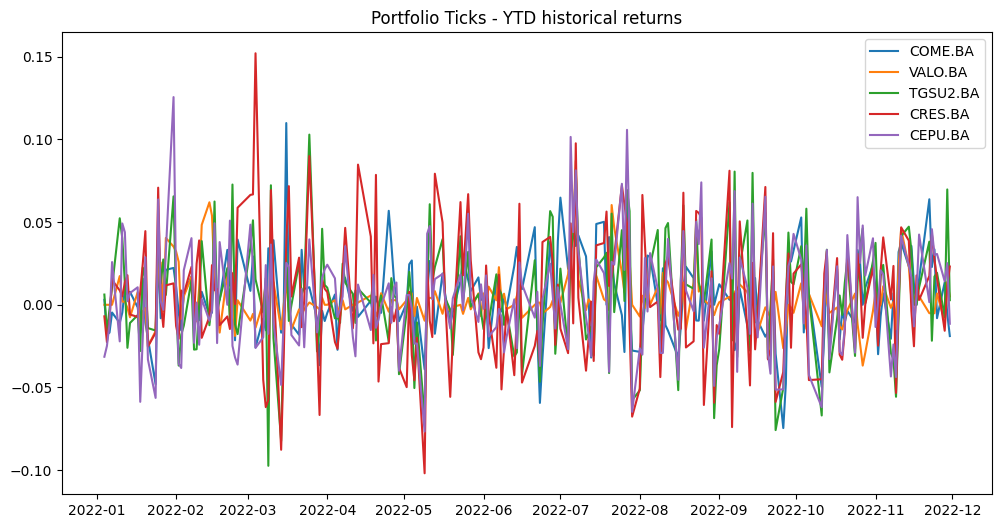

In [266]:
port.tick_returns()

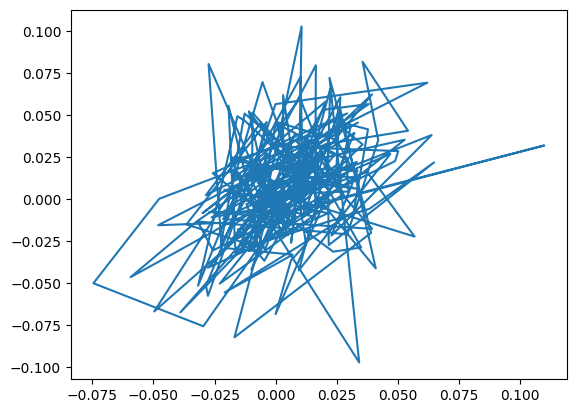

In [267]:
port.compare_ticks('COME.BA', 'TGSU2.BA')

### Conexión con APIs de Yahoo Finance:

In [268]:
merval = yf.Ticker('^MERV')
merval.history(period='max')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1996-10-08 00:00:00-03:00,579.400024,592.700012,579.400024,590.099976,0,0,0
1996-10-09 00:00:00-03:00,590.099976,590.799988,582.200012,583.099976,0,0,0
1996-10-10 00:00:00-03:00,583.200012,584.599976,578.299988,584.599976,0,0,0
1996-10-11 00:00:00-03:00,584.900024,585.900024,582.400024,584.299988,0,0,0
1996-10-14 00:00:00-03:00,584.299988,584.299988,580.599976,584.000000,0,0,0
...,...,...,...,...,...,...,...
2022-11-23 00:00:00-03:00,158169.296875,159411.906250,157826.906250,158563.500000,0,0,0
2022-11-24 00:00:00-03:00,158563.500000,161328.593750,158563.500000,160936.406250,0,0,0
2022-11-25 00:00:00-03:00,160936.406250,164001.093750,160632.593750,163716.906250,0,0,0


Creamos nuestro dataset descargando el registro histórico de los valores provistos por la página de Yahoo Finanzas. Elegimos como perído el último año ("ytd"), con intervalos de un día ("1d").

Tenemos que para cada activo tenemos las siguientes variables:
Adj. Close: es el precio a valor de cierre modificado luego de tomar en cuenta las acciones corporativas, como por ejemplo, división de dividendos.}
Close: es el precio al cierre de la actividades del día.
High: es el precio máximo que se da dentro del período.
Low: es el precio mínimo que se da dentro del período.
Open: es el precio en que inicia dentro del período.

In [269]:
data = yf.download(tickers= "^MERV COME.BA VALO.BA TGSU2.BA CRES.BA CEPU.BA", period= "ytd", interval= "1d")
data.columns

[*********************100%***********************]  6 of 6 completed


MultiIndex([('Adj Close',  'CEPU.BA'),
            ('Adj Close',  'COME.BA'),
            ('Adj Close',  'CRES.BA'),
            ('Adj Close', 'TGSU2.BA'),
            ('Adj Close',  'VALO.BA'),
            ('Adj Close',    '^MERV'),
            (    'Close',  'CEPU.BA'),
            (    'Close',  'COME.BA'),
            (    'Close',  'CRES.BA'),
            (    'Close', 'TGSU2.BA'),
            (    'Close',  'VALO.BA'),
            (    'Close',    '^MERV'),
            (     'High',  'CEPU.BA'),
            (     'High',  'COME.BA'),
            (     'High',  'CRES.BA'),
            (     'High', 'TGSU2.BA'),
            (     'High',  'VALO.BA'),
            (     'High',    '^MERV'),
            (      'Low',  'CEPU.BA'),
            (      'Low',  'COME.BA'),
            (      'Low',  'CRES.BA'),
            (      'Low', 'TGSU2.BA'),
            (      'Low',  'VALO.BA'),
            (      'Low',    '^MERV'),
            (     'Open',  'CEPU.BA'),
            (     'Open',

In [270]:
data["Close"]["CRES.BA"]

Date
2022-01-03    100.199997
2022-01-04     99.500000
2022-01-05     97.250000
2022-01-06     96.400002
2022-01-07     97.849998
                 ...    
2022-11-24    188.000000
2022-11-25    191.000000
2022-11-28    188.000000
2022-11-29    190.100006
2022-11-30    194.500000
Name: CRES.BA, Length: 224, dtype: float64